# Example: Gold-plated WR-3.0 Waveguide

- Calculate the effective conductivity of gold using the Gradient Model for different surface roughnesses.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt

# https://github.com/garrettj403/GradientModel
import gradientmodel as gm

# https://github.com/garrettj403/Waveguide
from waveguide import conductivity_4k

# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Material properties

In [3]:
# Metals
metals = ["Al", "Au", "Cu"]

# From Ashcroft & Mermin
ef   = dict(Cu=7.00,    Au=5.53,    Al=11.70)     # Fermi energy, eV
vf   = dict(Cu=1.57e6,  Au=1.40e6,  Al=2.03e6)    # Fermi velocity, m/s
ne   = dict(Cu=8.47e28, Au=5.90e28, Al=18.10e28)  # Electron density, m-3

# From Pozar
cond = dict(Cu=5.813e7, Au=4.098e7, Al=3.816e7)   # Conductivity, S/m

# Room temperature

In [4]:
# Frequency sweep for gradient model
frequency_gm = np.linspace(280, 360, 5) * sc.giga

In [5]:
# dc conductivity
conductivity_0 = cond['Au']

In [6]:
# Gradient model: 50nm surface roughness
surface_roughness1 = 50 * sc.nano
zs_gm1, conductivity_gm1, ur_gm1 = gm.rough_properties(frequency_gm, surface_roughness1, sigma0=conductivity_0)

# Gradient model: 75nm surface roughness
surface_roughness2 = 75 * sc.nano
zs_gm2, conductivity_gm2, ur_gm2 = gm.rough_properties(frequency_gm, surface_roughness2, sigma0=conductivity_0)

# Gradient model: 100nm surface roughness
surface_roughness3 = 100 * sc.nano
zs_gm3, conductivity_gm3, ur_gm3 = gm.rough_properties(frequency_gm, surface_roughness3, sigma0=conductivity_0)

In [7]:
# Polyfit for HFSS
p_zs_real_gm1 = np.polyfit(frequency_gm, zs_gm1.real, 2)
p_zs_real_gm2 = np.polyfit(frequency_gm, zs_gm2.real, 2)
p_zs_real_gm3 = np.polyfit(frequency_gm, zs_gm3.real, 2)
p_zs_imag_gm1 = np.polyfit(frequency_gm, zs_gm1.imag, 2)
p_zs_imag_gm2 = np.polyfit(frequency_gm, zs_gm2.imag, 2)
p_zs_imag_gm3 = np.polyfit(frequency_gm, zs_gm3.imag, 2)
p_ur_gm1 = np.polyfit(frequency_gm, ur_gm1, 2)
p_ur_gm2 = np.polyfit(frequency_gm, ur_gm2, 2)
p_ur_gm3 = np.polyfit(frequency_gm, ur_gm3, 2)

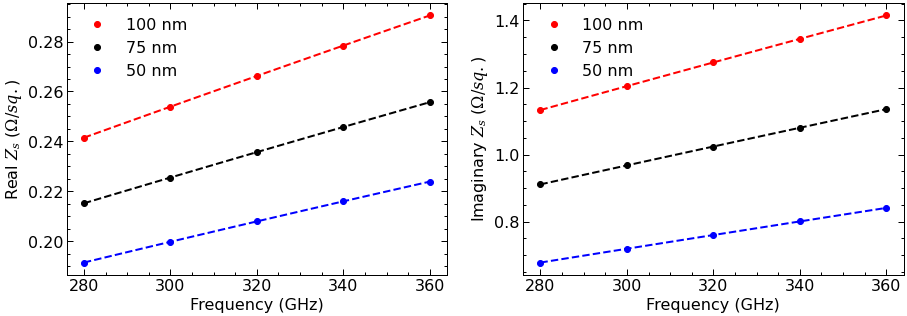

In [8]:
# Plot polyfit
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))

frequency = np.linspace(frequency_gm.min(), frequency_gm.max(), 101)

# Real component
ax0.plot(frequency_gm/1e9, zs_gm3.real, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm2.real, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm1.real, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm3, frequency), 'r--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm2, frequency), 'k--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm1, frequency), 'b--')
ax0.set_ylabel(r"Real $Z_s$ ($\Omega/sq.$)")
ax0.set_xlabel("Frequency (GHz)")
ax0.legend()

# Imaginary component
ax1.plot(frequency_gm/1e9, zs_gm3.imag, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm2.imag, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm1.imag, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm3, frequency), 'r--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm2, frequency), 'k--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm1, frequency), 'b--')
ax1.set_ylabel(r"Imaginary $Z_s$ ($\Omega/sq.$)")
ax1.set_xlabel("Frequency (GHz)")
ax1.legend();

In [10]:
def print_poly(poly):
    fpower_max = len(poly) - 1
    string = ""
    for i, p in enumerate(poly):
        fpower = fpower_max - i
        if fpower != 0:
            string += "{:.4e}".format(p) + " * Freq^{:d} + ".format(fpower)
        else:
            string += "{:.4e}".format(p)
    print(string)

print("Surface impedance (Z_s):")
print("\n{:.0f} nm surface roughness:".format(surface_roughness1/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm1)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm1)
print("\tur:\t\t", end=""); print_poly(p_ur_gm1)
print("\n{:.0f} nm surface roughness:".format(surface_roughness2/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm2)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm2)
print("\tur:\t\t", end=""); print_poly(p_ur_gm2)
print("\n{:.0f} nm surface roughness:".format(surface_roughness3/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm3)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm3)
print("\tur:\t\t", end=""); print_poly(p_ur_gm3)

Surface impedance (Z_s):

50 nm surface roughness:
	Real:		-1.6644e-25 * Freq^2 + 5.1199e-13 * Freq^1 + 6.1107e-02
	Imaginary:	-3.4813e-25 * Freq^2 + 2.2603e-12 * Freq^1 + 7.2291e-02
	ur:		-1.3448e-23 * Freq^2 + 5.0514e-11 * Freq^1 + 3.9464e+00

75 nm surface roughness:
	Real:		-1.5186e-25 * Freq^2 + 6.0379e-13 * Freq^1 + 5.8012e-02
	Imaginary:	-4.5447e-25 * Freq^2 + 3.0960e-12 * Freq^1 + 7.9819e-02
	ur:		-2.5105e-23 * Freq^2 + 9.6127e-11 * Freq^1 + 5.8256e+00

100 nm surface roughness:
	Real:		-1.4427e-25 * Freq^2 + 7.0489e-13 * Freq^1 + 5.5407e-02
	Imaginary:	-5.6445e-25 * Freq^2 + 3.8871e-12 * Freq^1 + 8.8834e-02
	ur:		-3.9840e-23 * Freq^2 + 1.5236e-10 * Freq^1 + 8.0508e+00


**Note:** In HFSS, select `Assign boundary > Impedance...` and then copy/paste these values into the dialog box.

# Cryogenic

In [11]:
# Frequency sweep for gradient model
frequency_gm = np.linspace(280, 360, 5) * sc.giga

In [12]:
conductivity_0 = conductivity_4k(frequency_gm, vf['Au'], ne['Au'], beta=1)

In [14]:
# Gradient model: 50nm surface roughness
surface_roughness1 = 50 * sc.nano
zs_gm1, conductivity_gm1, ur_gm1 = gm.rough_properties(frequency_gm, surface_roughness1, sigma0=conductivity_0)

# Gradient model: 75nm surface roughness
surface_roughness2 = 75 * sc.nano
zs_gm2, conductivity_gm2, ur_gm2 = gm.rough_properties(frequency_gm, surface_roughness2, sigma0=conductivity_0)

# Gradient model: 100nm surface roughness
surface_roughness3 = 100 * sc.nano
zs_gm3, conductivity_gm3, ur_gm3 = gm.rough_properties(frequency_gm, surface_roughness3, sigma0=conductivity_0)

In [15]:
# Polyfit for HFSS
p_zs_real_gm1 = np.polyfit(frequency_gm, zs_gm1.real, 2)
p_zs_real_gm2 = np.polyfit(frequency_gm, zs_gm2.real, 2)
p_zs_real_gm3 = np.polyfit(frequency_gm, zs_gm3.real, 2)
p_zs_imag_gm1 = np.polyfit(frequency_gm, zs_gm1.imag, 2)
p_zs_imag_gm2 = np.polyfit(frequency_gm, zs_gm2.imag, 2)
p_zs_imag_gm3 = np.polyfit(frequency_gm, zs_gm3.imag, 2)
p_ur_gm1 = np.polyfit(frequency_gm, ur_gm1, 2)
p_ur_gm2 = np.polyfit(frequency_gm, ur_gm2, 2)
p_ur_gm3 = np.polyfit(frequency_gm, ur_gm3, 2)

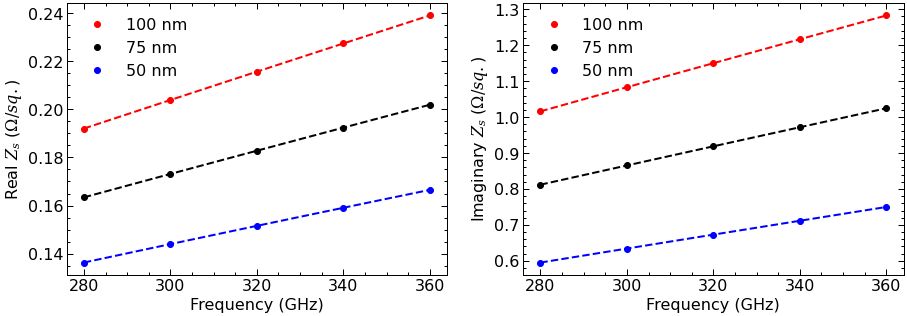

In [16]:
# Plot polyfit
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))

frequency = np.linspace(frequency_gm.min(), frequency_gm.max(), 101)

# Real component
ax0.plot(frequency_gm/1e9, zs_gm3.real, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm2.real, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax0.plot(frequency_gm/1e9, zs_gm1.real, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm3, frequency), 'r--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm2, frequency), 'k--')
ax0.plot(frequency/1e9, np.polyval(p_zs_real_gm1, frequency), 'b--')
ax0.set_ylabel(r"Real $Z_s$ ($\Omega/sq.$)")
ax0.set_xlabel("Frequency (GHz)")
ax0.legend()

# Imaginary component
ax1.plot(frequency_gm/1e9, zs_gm3.imag, 'ro', label=r'{:.0f} nm'.format(surface_roughness3/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm2.imag, 'ko', label=r'{:.0f} nm'.format(surface_roughness2/sc.nano))
ax1.plot(frequency_gm/1e9, zs_gm1.imag, 'bo', label=r'{:.0f} nm'.format(surface_roughness1/sc.nano))
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm3, frequency), 'r--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm2, frequency), 'k--')
ax1.plot(frequency/1e9, np.polyval(p_zs_imag_gm1, frequency), 'b--')
ax1.set_ylabel(r"Imaginary $Z_s$ ($\Omega/sq.$)")
ax1.set_xlabel("Frequency (GHz)")
ax1.legend();

In [17]:
def print_poly(poly):
    fpower_max = len(poly) - 1
    string = ""
    for i, p in enumerate(poly):
        fpower = fpower_max - i
        if fpower != 0:
            string += "{:.4e}".format(p) + " * Freq^{:d} + ".format(fpower)
        else:
            string += "{:.4e}".format(p)
    print(string)

print("Surface impedance (Z_s):")
print("\n{:.0f} nm surface roughness:".format(surface_roughness1/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm1)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm1)
print("\tur:\t\t", end=""); print_poly(p_ur_gm1)
print("\n{:.0f} nm surface roughness:".format(surface_roughness2/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm2)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm2)
print("\tur:\t\t", end=""); print_poly(p_ur_gm2)
print("\n{:.0f} nm surface roughness:".format(surface_roughness3/sc.nano))
print("\tReal:\t\t", end=""); print_poly(p_zs_real_gm3)
print("\tImaginary:\t", end=""); print_poly(p_zs_imag_gm3)
print("\tur:\t\t", end=""); print_poly(p_ur_gm3)

Surface impedance (Z_s):

50 nm surface roughness:
	Real:		-9.1880e-26 * Freq^2 + 4.3694e-13 * Freq^1 + 2.1110e-02
	Imaginary:	-2.2160e-25 * Freq^2 + 2.0745e-12 * Freq^1 + 3.1748e-02
	ur:		-4.2960e-23 * Freq^2 + 8.6202e-11 * Freq^1 + 1.3994e+01

75 nm surface roughness:
	Real:		-8.6135e-26 * Freq^2 + 5.3715e-13 * Freq^1 + 1.9743e-02
	Imaginary:	-2.9325e-25 * Freq^2 + 2.8450e-12 * Freq^1 + 3.8237e-02
	ur:		-8.2364e-23 * Freq^2 + 1.6499e-10 * Freq^1 + 2.4930e+01

100 nm surface roughness:
	Real:		-8.3170e-26 * Freq^2 + 6.4194e-13 * Freq^1 + 1.8823e-02
	Imaginary:	-3.6587e-25 * Freq^2 + 3.5693e-12 * Freq^1 + 4.5215e-02
	ur:		-1.3093e-22 * Freq^2 + 2.6138e-10 * Freq^1 + 3.8347e+01


**Note:** In HFSS, select `Assign boundary > Impedance...` and then copy/paste these values into the dialog box.